In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import *

In [2]:
from qutip import *

# Parameters

In [3]:
def chi(): 
    return g**2 / (delta * (delta + A)) * A

In [4]:
chi1 = 200 * 1e-6 # in units of Ghz
chi2 = 200 * 1e-6

alpha1 = 5 
alpha2 = 5

del_c1 = 10 * 1e-3  # Cavity drive detunings 
del_c2 = 10 * 1e-3

Omega_q = 10 * 1e-3

g12 = np.sqrt(chi1 * chi2) / 4 # cross kerr

In [5]:
g12

4.9999999999999996e-05

In [6]:
chi1 * alpha1

0.001

In [7]:
n_q = 2
n_c = 50

#qutip ops
# Creating identity, annhilitation/creation, num operators 
identity_q = qeye(n_q)
identity_c = qeye(n_c)

a_q = destroy(n_q)
a_c = destroy(n_c)

adag_q = create(n_q)
adag_c = create(n_c)

num_q = num(n_q)
num_c =  num(n_c)

In [8]:
def dot( state1, state2):
    '''
    dotting both states
    '''
    fid = state1.overlap(state2)
    return fid*np.conjugate(fid)

In [9]:
def get_fidelity(state, target) : 
    def dot( state1, state2):
            '''
            dotting both states
            '''
            fid = state1.overlap(state2)
            return fid*np.conjugate(fid)
        
    if (state.type == 'ket') and (target.type == 'ket'):
        result = dot(state, target)

    elif (state.type == 'oper') and (target.type == 'ket'): #density matrix alert
        target_rho= target*target.dag()
        result = np.sqrt(dot(state, target_rho)) # Hilbert schmidt prod is enough, no need for squaring (try to do this for pure states and you'll get why sqrt used here)
    return result

In [10]:
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)
def plot_populations(states, figname = 'figure'):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
#         if self.save_states:
#             output_states = qload(self.states_filename)
    output_states = states


    fig, axs = plt.subplots(2,1, figsize=(10,8))
    probs = []
    times = [k/1000 for k in range(len(output_states))]
    max_num_levels = 3 # to be shown on the plot

    #qubit grounded
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,0), basis(n_c, i), basis(n_c, j))
            pops = []
            for k in range(len(output_states)): 
                z = dot(target ,output_states[k])
                pops.append(z)
            axs[0].plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')

    #qubit excited
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,1), basis(n_c, i), basis(n_c, j))
            pops = []
            for k in range(len(output_states)): 
                z = dot(target ,output_states[k])
                pops.append(z)
            axs[1].plot(times, pops, linestyle = '--',  label = '|e,'+str(i)+',' + str(j)+'>')

    axs[1].set_xlabel(r"Time ($\mu$s)", fontsize = 18)
    axs[1].set_ylabel("Populations", fontsize = 18)
    axs[0].set_ylabel("Populations", fontsize = 18)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')

In [11]:
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)
def plot_populations_plus_minus(states, figname = 'figure', times_ = None):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
#         if self.save_states:
#             output_states = qload(self.states_filename)
    output_states = states


    fig, axs = plt.subplots(2,1, figsize=(10,8))
    probs = []
    times = [k/1000 for k in range(len(output_states))]
    if times_ is not None: 
        times = times_
    
    max_num_levels = 3 # to be shown on the plot

    #qubit grounded (sigmx)
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(plus, basis(n_c, i), basis(n_c, j))
            pops = []
            for k in range(len(output_states)): 
                z = dot(target ,output_states[k])
                pops.append(z)
            axs[0].plot(times, pops, label = '|+,'+str(i)+',' + str(j)+'>')

    #qubit excited (sigmax)
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(minus, basis(n_c, i), basis(n_c, j))
            pops = []
            for k in range(len(output_states)): 
                z = dot(target ,output_states[k])
                pops.append(z)
            axs[1].plot(times, pops, linestyle = '--',  label = '|-,'+str(i)+',' + str(j)+'>')

    axs[1].set_xlabel(r"Time ($\mu$s)", fontsize = 18)
    axs[1].set_ylabel("Populations", fontsize = 18)
    axs[0].set_ylabel("Populations", fontsize = 18)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')

## Displaced Frame  + Hadamard Hamiltonian

$$ H = \sum_{i = 1,2} \Delta_{c, i} a_i ^\dagger a  - \Omega_q \sigma_z/2 + \chi_i \alpha_i (a_i^\dagger + a)(\sigma^+ + \sigma^-) $$

In [15]:
times = np.linspace(0, 8000, 2000)

In [16]:
H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
      
      -1* Omega_q * tensor(sigmaz(), identity_c, identity_c)/2   + 
      chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c) +
      chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c)
     )
     
cos1 = np.array([np.cos(del_c1 * t) for t in times])
cos2 = np.array([np.cos(del_c2 * t) for t in times])

H = [H0, 
    #[ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
     # [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
    ]
c_ops = []

In [17]:
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(g_state, basis(n_c,0), basis(n_c, 1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

C:\Users\Eesh Gupta\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


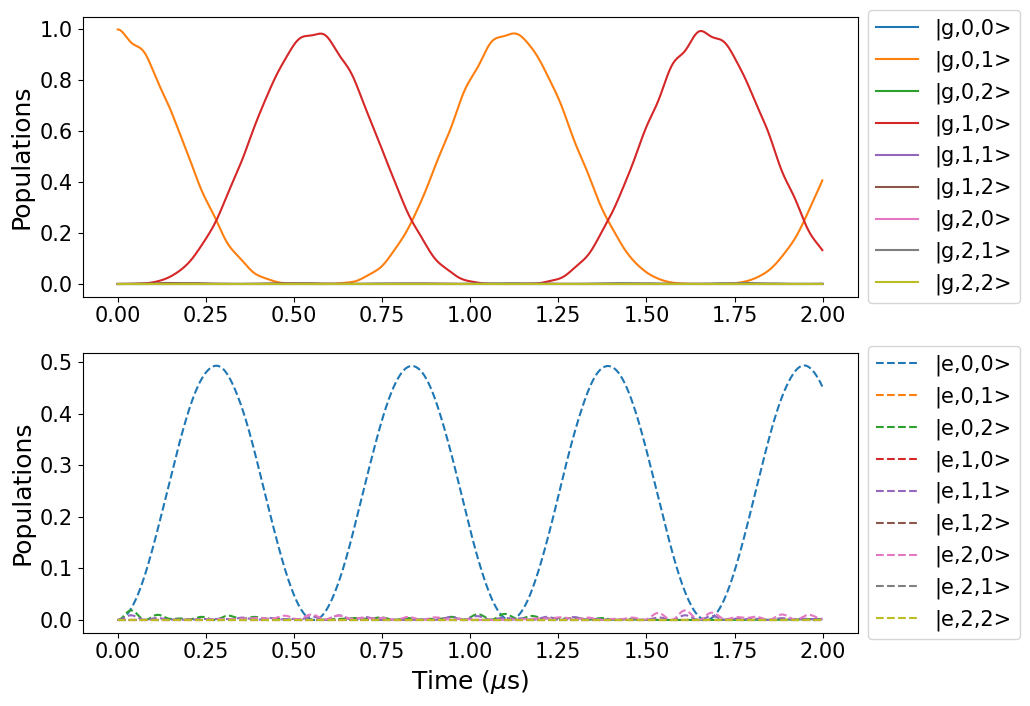

In [18]:
data = qload(states_filename)
plot_populations(data, figname = 'test')
plt.show()

### Find Frequencies of oscilation

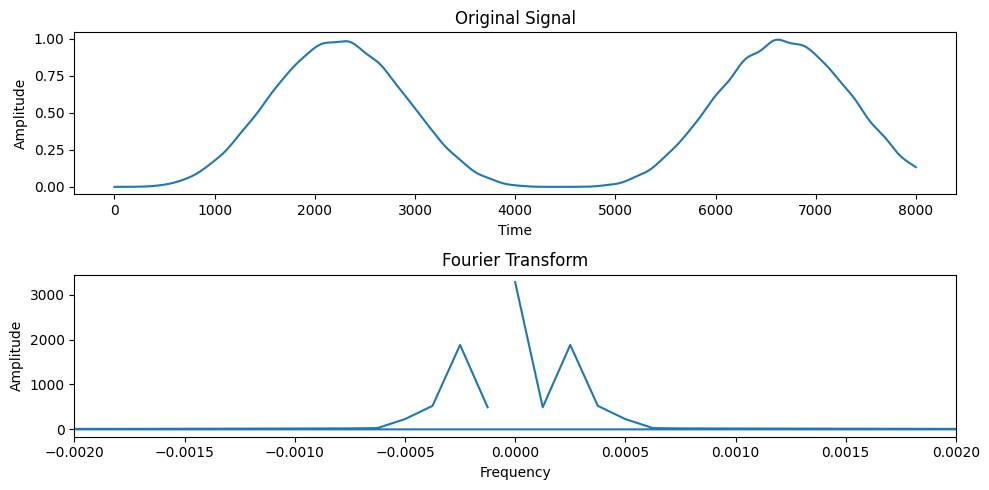

In [81]:
#fourier transform
target_state = tensor(g_state, basis(n_c,1), basis(n_c, 0))

# Generate some sample data
data = np.array([dot(target_state ,output.states[k]) for k in range(len(output.states)) ])

# Perform Fourier transform
fft_result = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(times), times[1] - times[0])  # Frequency bins

# Plot the original signal
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(times, data)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the Fourier transform result
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(-0.002, 0.002)  # Limit the x-axis to focus on lower frequencies
plt.tight_layout()
plt.show()


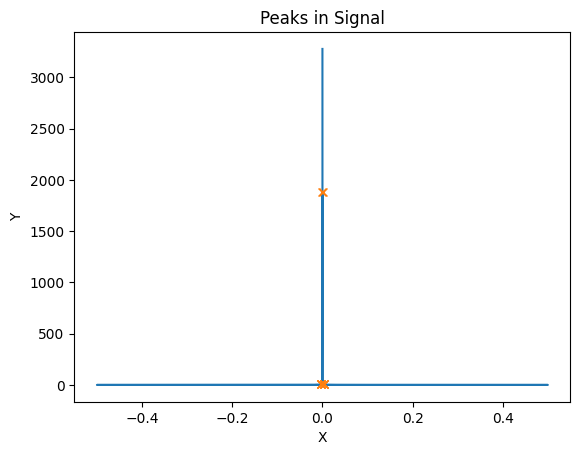

Peaks found at indices: [   2   20   23   29   32 7968 7971 7977 7980 7998]
Frequencies values: [ 0.00024997  0.00249969  0.00287464  0.00362455  0.0039995  -0.0039995
 -0.00362455 -0.00287464 -0.00249969 -0.00024997]


In [85]:
import numpy as np
from scipy.signal import find_peaks

# Example data
x = frequencies#np.linspace(0, 4*np.pi, 100)
y = np.abs(fft_result)

# Find peaks
peaks, _ = find_peaks(y)

# Plotting
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.plot(x[peaks], y[peaks], "x")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Peaks in Signal')
plt.show()

print("Peaks found at indices:", peaks)
print("Frequencies values:", x[peaks])
#print("Frequencies:", frequencie[peaks])


In [86]:
from scipy.signal import find_peaks

def find_state_osc(states, target_state):
    '''
    Find the lowest frequency at which the target state oscillates 
    '''
    # Generate some sample data
    data = np.array([dot(target_state ,output.states[k]) for k in range(len(output.states)) ])
    
    # Perform Fourier transform
    fft_result = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(times), times[1] - times[0])  # Frequency bins

    # Example data
    x = frequencies#np.linspace(0, 4*np.pi, 100)
    y = np.abs(fft_result)
    
    # Find peaks
    peaks, _ = find_peaks(y)

    return x[peaks[0]]

In [87]:
target_state = tensor(g_state, basis(n_c,1), basis(n_c, 0))
print('Oscillation frequency'find_state_osc(output.states, target_state)

0.00024996875

In [75]:
frequencies

array([ 0.        ,  0.00024994,  0.00049987, ..., -0.00074981,
       -0.00049987, -0.00024994])

## Displaced Frame  + Hadamard Hamiltonian (swapping 2 photons)

$$ H = \sum_{i = 1,2} \Delta_{c, i} a_i ^\dagger a  - \Omega_q \sigma_z/2 + \chi_i \alpha_i (a_i^\dagger + a)(\sigma^+ + \sigma^-) $$

In [20]:
Omega_q = 2 * del_c1

In [31]:
del_c1 = 0.01
del_c2 = 0.014
Omega_q = 0.012

In [32]:
times = np.linspace(0, 4000, 4000)

In [33]:
H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
      
      -1* Omega_q * tensor(sigmaz(), identity_c, identity_c)/2   + 
      chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c) +
      chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c)
     )
     
cos1 = np.array([np.cos(del_c1 * t) for t in times])
cos2 = np.array([np.cos(del_c2 * t) for t in times])

H = [H0, 
    #[ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
     # [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
    ]
c_ops = []

In [34]:
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(g_state, basis(n_c,0), basis(n_c, 1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g2_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

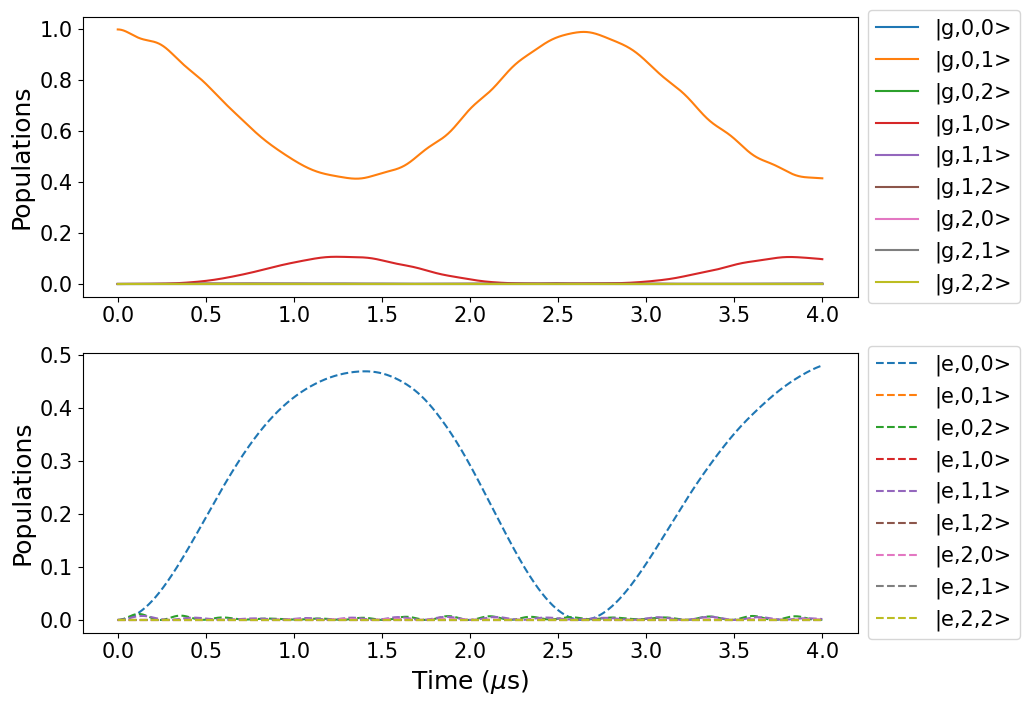

In [35]:
#data = qload(states_filename)
plot_populations(output.states, figname = 'test')
plt.show()

In [36]:
# NEED To modulate the frequency 

## Displaced Frame  + Hadamard Hamiltonian (Modulating the frequency of the coupler)

$$ H = \sum_{i = 1,2} \Delta_{c, i} a_i ^\dagger a  - \epsilon cos(\Delta_c t)\sigma_z/2 + \chi_i \alpha_i (a_i^\dagger + a)(\sigma^+ + \sigma^-) $$

In [19]:
del_c1 = 0.01
del_c2 = 0.01
epsilon = 0.005
omega_c = del_c1

In [59]:
times = np.linspace(0, 4000, 1000)

In [20]:
H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
      
     # -1* Omega_q * tensor(sigmaz(), identity_c, identity_c)/2   + 
      chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c) +
      chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c)
     )
     
#cos1 = np.array([np.cos(del_c1 * t) for t in times])
#cos2 = np.array([np.cos(del_c2 * t) for t in times])

cos_c = np.array([np.cos(omega_c * t) for t in times])

H = [H0, 
    [-1 * tensor(sigmaz(), identity_c, identity_c)/2, epsilon * cos_c], 
     #[ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
     # [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
    ]
c_ops = []

In [21]:
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(g_state, basis(n_c,0), basis(n_c, 1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g2_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

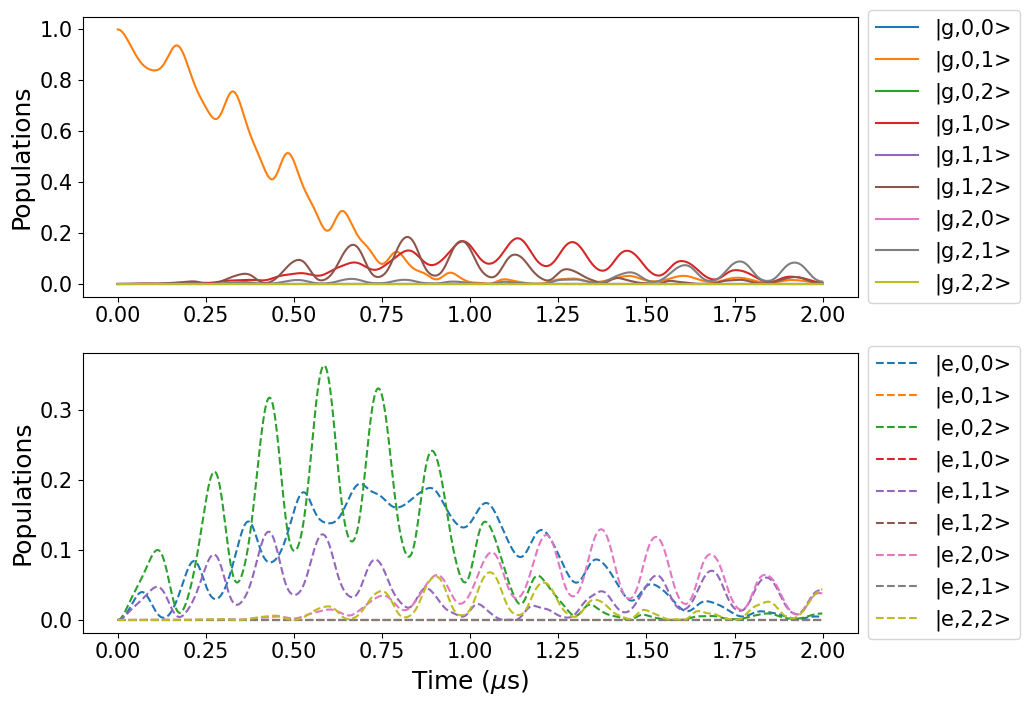

In [22]:
#data = qload(states_filename)
plot_populations(output.states, figname = 'test')
plt.show()

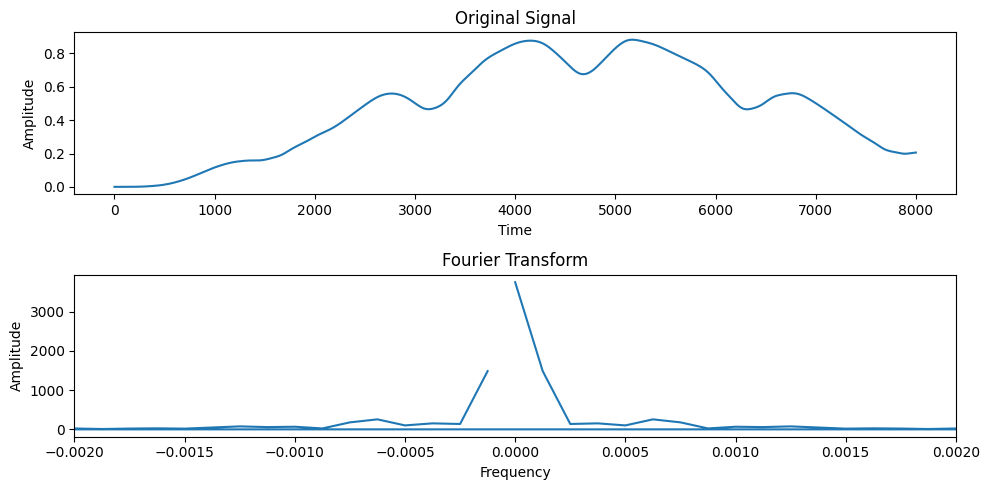

In [63]:
# fourier transforming the data:
import numpy as np
import matplotlib.pyplot as plt

target_state = tensor(g_state, basis(n_c,1), basis(n_c, 0))

# Generate some sample data
data = np.array([dot(target_state ,output.states[k]) for k in range(len(output.states)) ])

# Perform Fourier transform
fft_result = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(times), times[1] - times[0])  # Frequency bins

# Plot the original signal
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(times, data)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the Fourier transform result
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(-0.002, 0.002)  # Limit the x-axis to focus on lower frequencies
plt.tight_layout()
plt.show()


In [65]:
frequencies

array([ 0.        ,  0.00012498,  0.00024997, ..., -0.00037495,
       -0.00024997, -0.00012498])

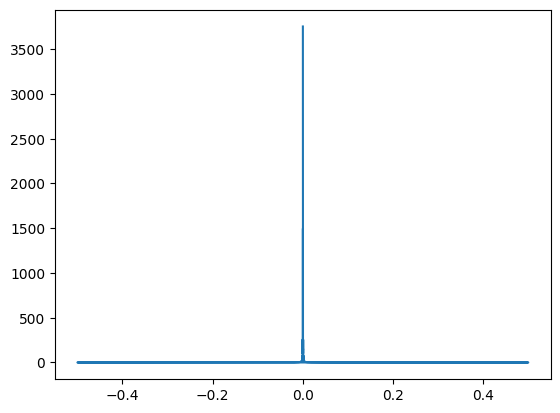

In [64]:
plt.plot(frequencies, np.abs(fft_result))
#plt.xscale('log')

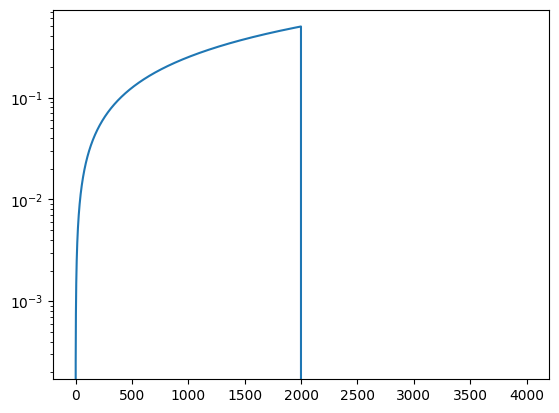

In [46]:
plt.plot(frequencies)
plt.yscale('log')

## Displaced Frame 
$$ H = \sum_{i = 1,2} \Delta_{c, i} a_i ^\dagger a  + \Omega_q \sigma_x/2 - \chi_i \alpha_i (a_i^\dagger + a)\sigma_z $$

In [18]:
times = np.linspace(0, 4000, 4000)

In [19]:
H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
      
      +1* Omega_q * tensor(sigmax(), identity_c, identity_c)/2   + 
      -1* chi1 * alpha1 * tensor(sigmaz(), a_c + adag_c, identity_c) +
      -1* chi2 * alpha2 * tensor(sigmaz(), identity_c, a_c + adag_c)
     )
     
cos1 = np.array([np.cos(del_c1 * t) for t in times])
cos2 = np.array([np.cos(del_c2 * t) for t in times])

H = [H0, 
    #[ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
     # [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
    ]
c_ops = []

In [23]:
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(minus, basis(n_c,0), basis(n_c, 1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

In [24]:
# data = qload(states_filename)
# plot_populations(data, figname = 'test')
# plt.show()

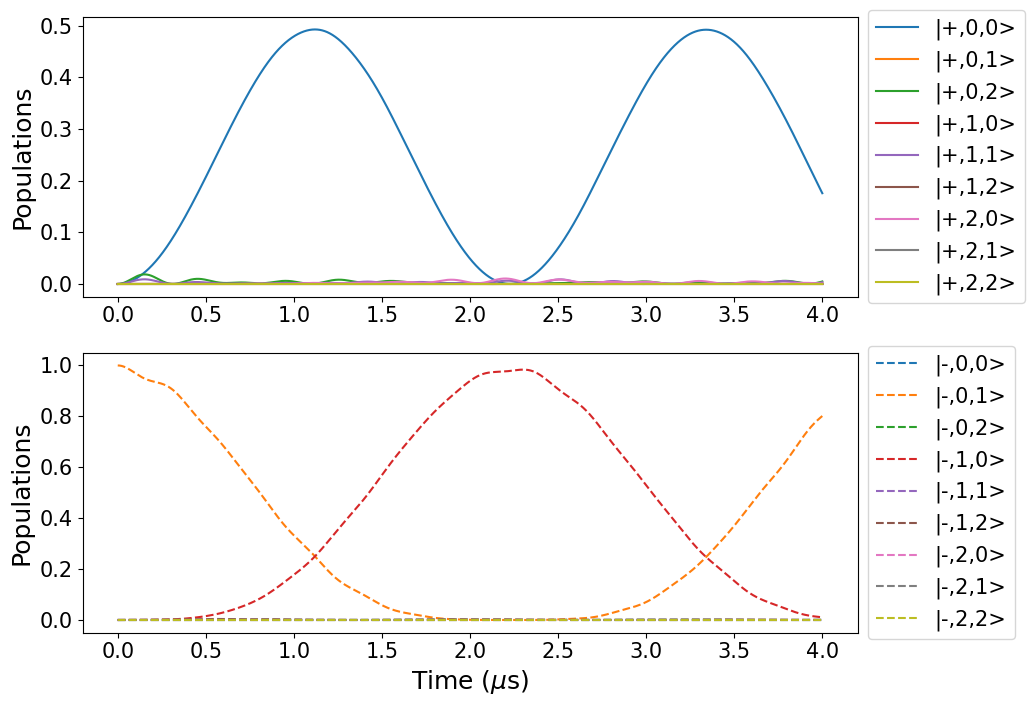

In [25]:
data = qload(states_filename)
plot_populations_plus_minus(data, figname = 'test')
plt.show()

## Displaced Frame + other terms from enhanced dispersive interaction
$$ H = \sum_{i = 1,2} \Delta_{c, i} a_i ^\dagger a  + \Omega_q \sigma_x/2 - \chi_i \alpha_i (a_i^\dagger + a)\sigma_z -\chi_i a^\dagger a \sigma_z - \chi_i |\alpha_i|^2 \sigma_z$$

In [28]:
times = np.linspace(0, 4000, 4000)

In [29]:
H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
      
      +1* Omega_q * tensor(sigmax(), identity_c, identity_c)/2   + 
      -1* chi1 * alpha1 * tensor(sigmaz(), a_c + adag_c, identity_c) +   # cpnd disp
      -1* chi2 * alpha2 * tensor(sigmaz(), identity_c, a_c + adag_c)
      
      -1* chi1 * alpha1 * tensor(sigmaz(), num_c, identity_c) # dispersive interaction
      -1* chi2 * alpha2 * tensor(sigmaz(), identity_c, num_c)
      
      -1* chi1 * alpha1 * alpha1 * tensor(sigmaz(), identity_c, identity_c) # AC stark shifts
      -1* chi2 * alpha2 * alpha2 * tensor(sigmaz(), identity_c, identity_c)
     )
     
cos1 = np.array([np.cos(del_c1 * t) for t in times])
cos2 = np.array([np.cos(del_c2 * t) for t in times])

H = [H0, 
    #[ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
     # [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
    ]
c_ops = []

In [31]:
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(minus, basis(n_c,0), basis(n_c, 1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

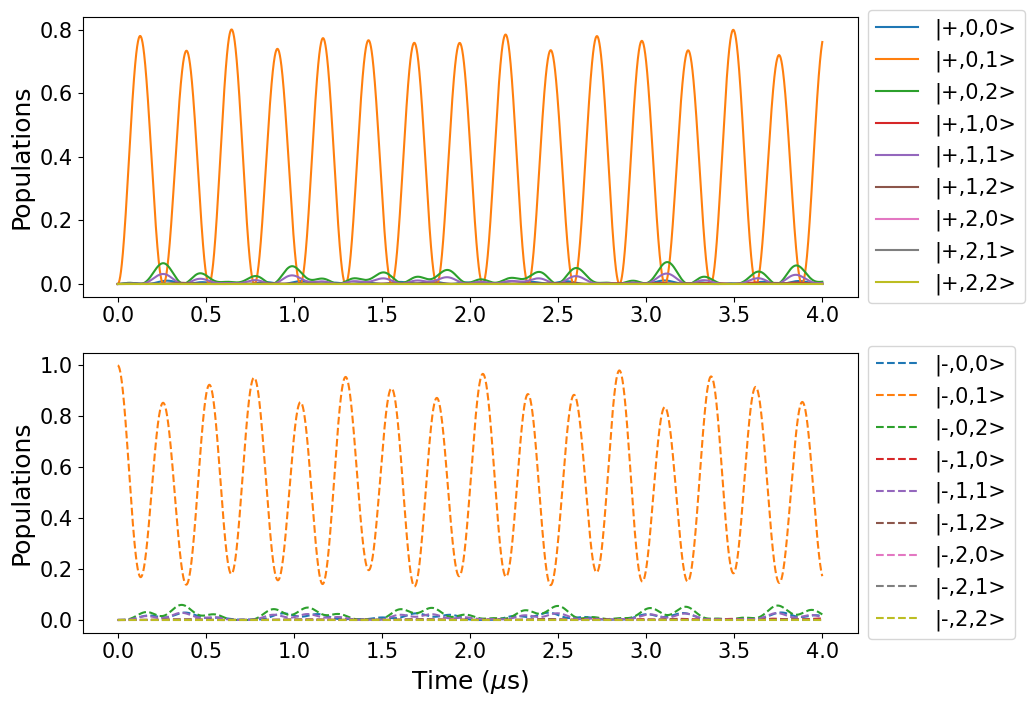

In [32]:
data = qload(states_filename)
plot_populations_plus_minus(data, figname = 'test')
plt.show()

Makes sense as \chi * alpha^2 is doing - + rotations at 5 Mhz ( faster than swap rate of 1 Mhz)

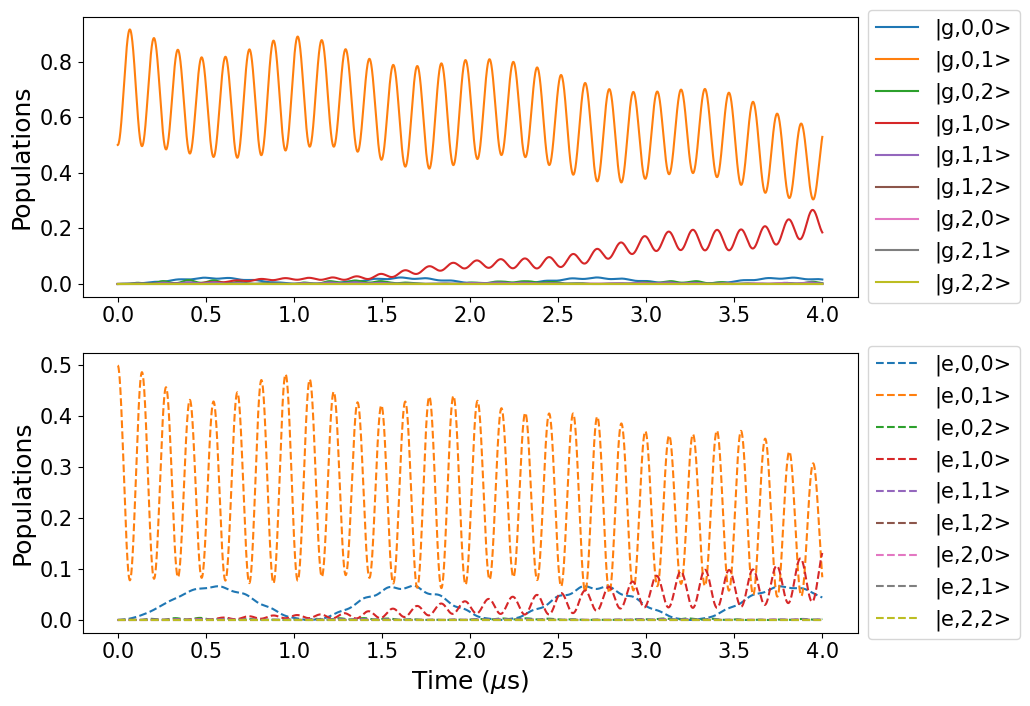

In [228]:
# data = qload(states_filename)
# plot_populations(data, figname = 'test')
# plt.show()

Removing the ACStark shift-1* chi1 * alpha1 * alpha1 * tensor(sigmaz(), identity_c, identity_c)

In [33]:
H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
      
      +1* Omega_q * tensor(sigmax(), identity_c, identity_c)/2   + 
      -1* chi1 * alpha1 * tensor(sigmaz(), a_c + adag_c, identity_c) +   # cpnd disp
      -1* chi2 * alpha2 * tensor(sigmaz(), identity_c, a_c + adag_c)
      
      -1* chi1 * alpha1 * tensor(sigmaz(), num_c, identity_c) # dispersive interaction
      -1* chi2 * alpha2 * tensor(sigmaz(), identity_c, num_c)
      
      #-1* chi1 * alpha1 * alpha1 * tensor(sigmaz(), identity_c, identity_c) # AC stark shifts
      #-1* chi2 * alpha2 * alpha2 * tensor(sigmaz(), identity_c, identity_c)
     )
     
cos1 = np.array([np.cos(del_c1 * t) for t in times])
cos2 = np.array([np.cos(del_c2 * t) for t in times])

H = [H0, 
    #[ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
     # [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
    ]
c_ops = []

In [34]:
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(minus, basis(n_c,0), basis(n_c, 1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

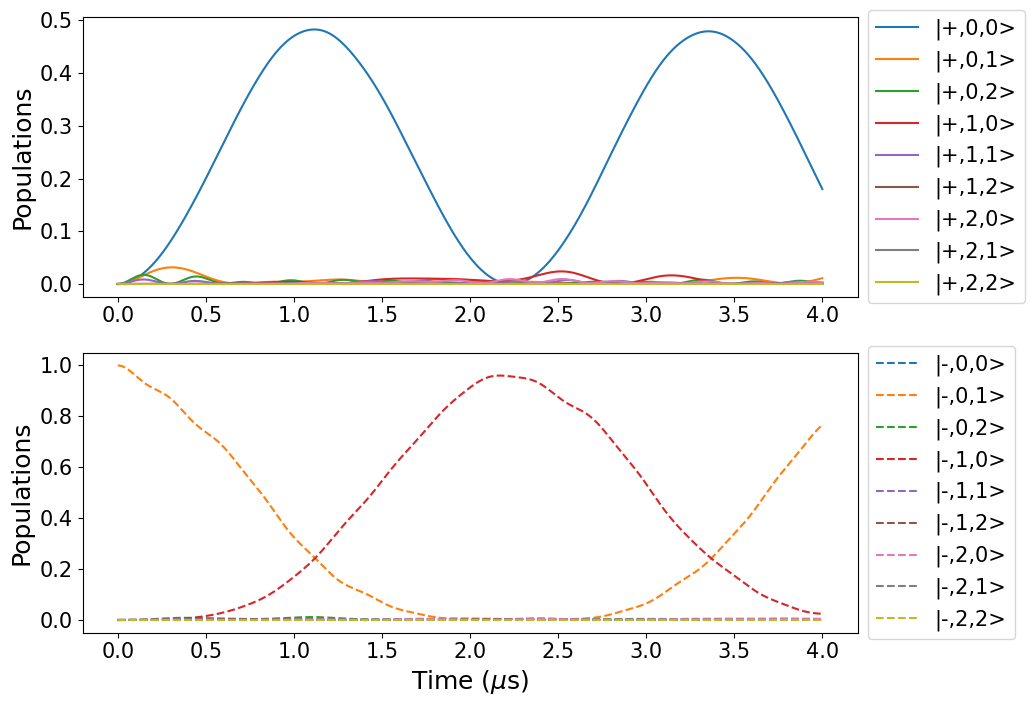

In [35]:
data = qload(states_filename)
plot_populations_plus_minus(data, figname = 'test')
plt.show()

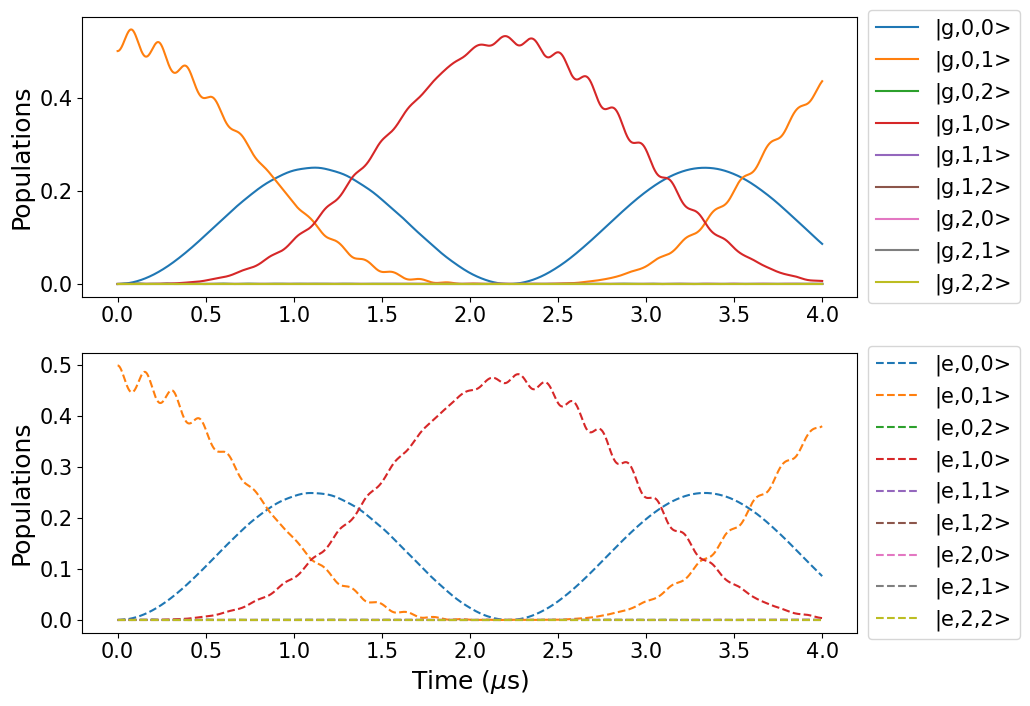

In [231]:
# data = qload(states_filename)
# plot_populations(data, figname = 'test')
# plt.show()

## Displaced Frame  + Hadamard Hamiltonian with Shay's interaction

as given by Shay's work

$$ H = \sum_{i = 1,2} \Omega_q \sigma_z/2 + \chi_i \alpha_i \cos(\Delta_{c,i} t)(a_i^\dagger + a)(\sigma^+ + \sigma^-) $$

In [26]:
times = np.linspace(0, 4000, 1000)

In [27]:
H0 = (#del_c1*tensor(identity_q, num_c, identity_c) +
      #del_c2*tensor(identity_q, identity_c, num_c) +
      
      +1* Omega_q * tensor(sigmaz(), identity_c, identity_c)/2  # + 
      #2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c) +
     # 2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c)
     )
     
cos1 = np.array([np.cos(del_c1 * t) for t in times])
cos2 = np.array([np.cos(del_c2 * t) for t in times])

H = [H0, 
    [ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
      [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
    ]
c_ops = []

In [28]:
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)

psi0 = tensor(basis(n_q, 1), basis(n_c,0), basis(n_c, 1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

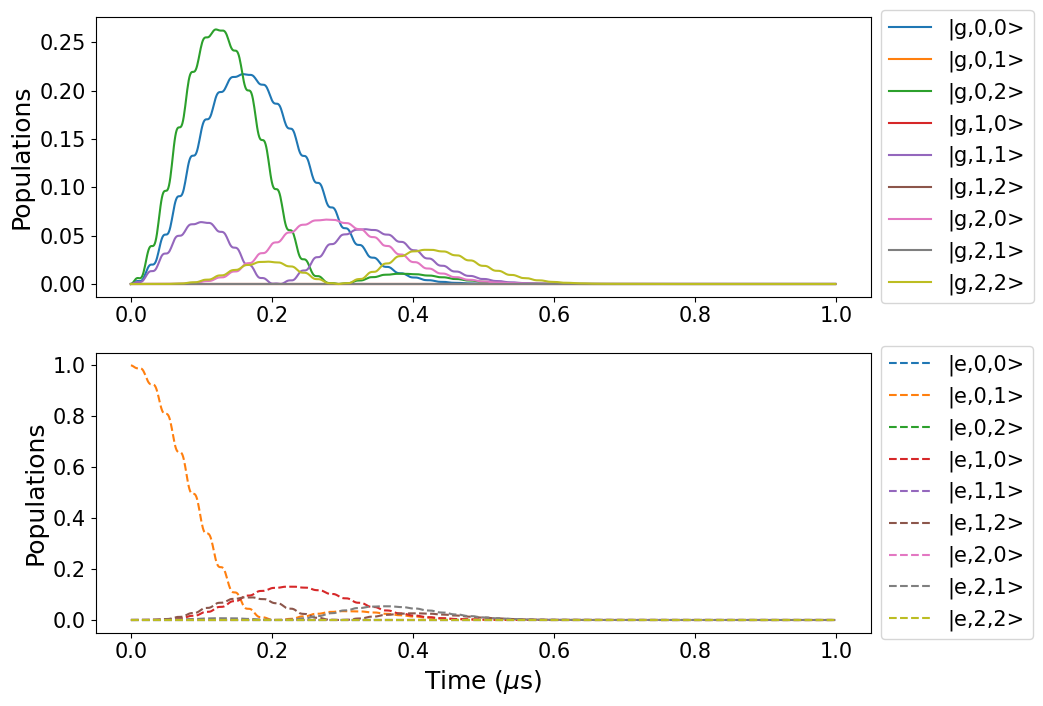

In [29]:
data = qload(states_filename)
plot_populations(data, figname = 'test')
plt.show()

## Displaced Frame  + Hadamard + Rotating frame of detuning

$$ H = \sum_{i = 1,2}  \Omega_q \sigma_z/2 + \chi_i \alpha_i (a_i^\dagger + a)(\sigma^+ + \sigma^-) $$

In [106]:
times = np.linspace(0, 4000, 4000)

In [107]:
H0 = (#del_c1*tensor(identity_q, num_c, identity_c) +
      #del_c2*tensor(identity_q, identity_c, num_c) +
      
      +1* Omega_q * tensor(sigmaz(), identity_c, identity_c)/2  + 
      2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c) +
      2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c)
     )
     
cos1 = np.array([np.cos(del_c1 * t) for t in times])
cos2 = np.array([np.cos(del_c2 * t) for t in times])

H = [H0, 
   # [ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
    #  [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
    ]
c_ops = []

In [110]:
plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)

psi0 = tensor(basis(n_q, 0), basis(n_c,0), basis(n_c, 1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

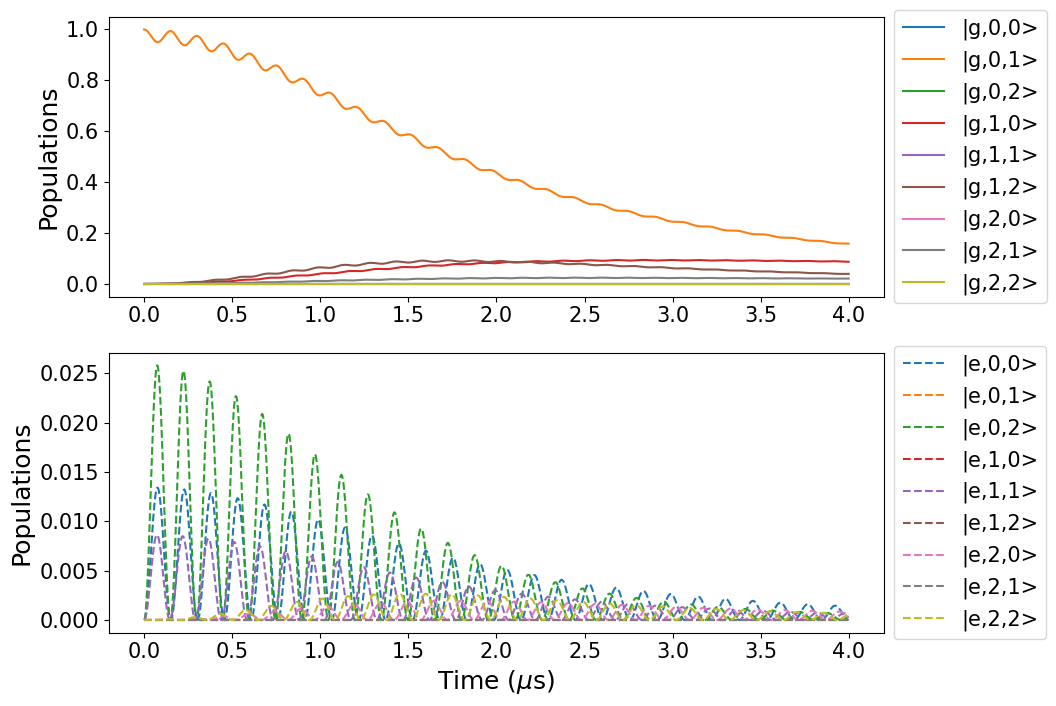

In [111]:
data = qload(states_filename)
plot_populations(data, figname = 'test')
plt.show()

# Not Displaced Frame

## Cavity Drive calibration

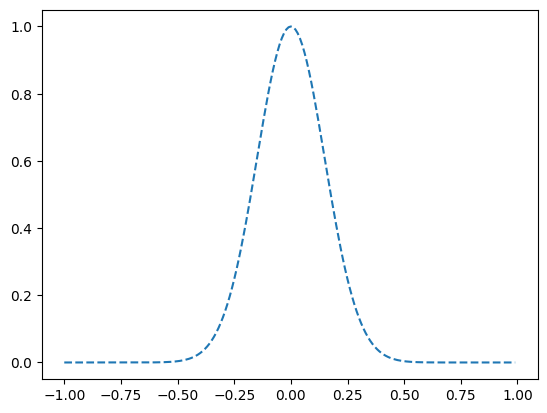

In [36]:
# cavity drive 

t = np.linspace(-1, 1, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=5, retquad=True, retenv=True)
plt.plot(t, e, '--')
plt.show()

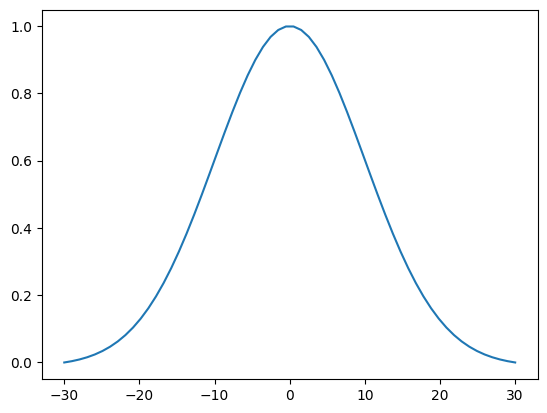

In [37]:
def gaussian_wave(sigma = 10, chop=4):
    '''source: Alec ECD'''
    ts = np.linspace(-chop / 2 * sigma, chop / 2 * sigma, chop * sigma)
    P = np.exp(-(ts**2) / (2.0 * sigma**2))
    ofs = P[0]
    return ts, (P - ofs) / (1 - ofs)

ts, pulse = gaussian_wave(10, 6)
plt.plot(ts, pulse)
plt.show()

In [38]:
#normalize 
from scipy.integrate import quad

def gaussian(t, amp = 1):
    '''
    returns a point sampled from a gaussian centered at t = 20
    '''
    sigma = 10
    chop = 4
    ts = np.linspace(-chop / 2 * sigma, chop / 2 * sigma, chop * sigma)
    Ps = amp * np.exp(-((ts)**2) / (2.0 * sigma**2))
    ofs = Ps[0]
    
    p = amp * np.exp(-((t-20)**2) / (2.0 * sigma**2))
    
    p = (p - ofs) / (1 - ofs)
    #print(ofs)
    return p

area = integrate.quad(gaussian, 0, 40 )[0] 

def norm_gaussian_wave(t, omega_d):
    '''
    returns a point sampled from a gaussian centered at t = 20
    with sinusodial component modulating at omega d
    '''
 
    p = gaussian(t, amp = 1/area)
    
    return p * np.exp(1.0j * omega_d * t) # add 2 pi later

In [39]:
norm_gaussian_wave(0, 0)

0j

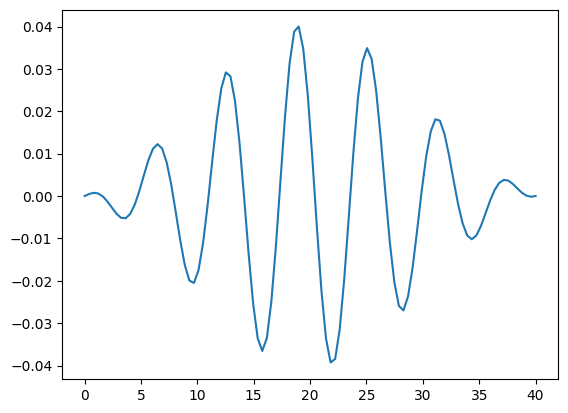

In [40]:
ts = np.linspace(0, 40, 100)
plt.plot(ts, norm_gaussian_wave(ts, 100*del_c1))
plt.show()

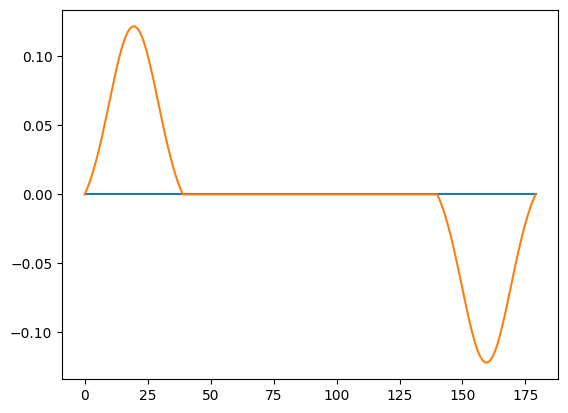

In [41]:
# cavity drive 
def cavity_drive(alpha = 2, omega_d = 0 , tw = 100):
    '''
    tw is wait time 
    pulse pattern - displace - wait - displace back
    '''

    ts = np.linspace(0, 40, 40)
    wave =  1.0j * alpha * norm_gaussian_wave(ts, omega_d)

    # pulse pattern - displace - wait - displace back
    disp = wave.copy()
    wait = np.array([0 for i in range(tw)])
    disp_back = -1 * wave.copy()
    pulse = np.concatenate((disp, wait, disp_back))
    return pulse 
pulse = cavity_drive(alpha = 3)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

In [42]:
def alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0.0j):
    dt = 1
    alpha = np.zeros_like(epsilon_array)
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    -1j * delta * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    - 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

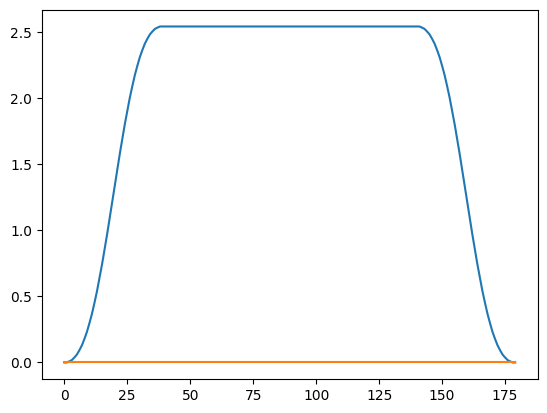

In [43]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(pulse)
plt.plot(alpha.real)
plt.plot(alpha.imag)
plt.show()

# Rotating frame with resonant cavity drive and detuned qubit 
$$ H = \sum_{i = 1,2} \Delta_{c, i} a_i ^\dagger a  + \Delta_q \sigma_z /2+  \Omega_q \sigma_x/2 - \chi_i a_i^\dagger a\sigma_z + [\epsilon(t) a^\dagger + h.c.] $$

In [134]:
def cavity_drive(alpha = 2, omega_d = 0 , tw = 100, delta = 0):
    '''
    tw is wait time 
    pulse pattern - displace - wait - displace back
    '''

    ts = np.linspace(0, 40, 40)
    wave =  1.0j * alpha * norm_gaussian_wave(ts, omega_d)
    alpha0= alpha_from_epsilon_nonlinear_finite_difference(wave, delta = del_c1)[-1]

    # pulse pattern - displace - wait - displace back
    disp =  wave.copy()
    wait = np.array([-1 * delta * alpha0 for i in range(tw)])
    disp_back =  wave.copy() * -1 * np.exp(-1.0j * delta * ( len(disp)))
    pulse = np.concatenate((disp, wait, disp_back))
    return pulse 

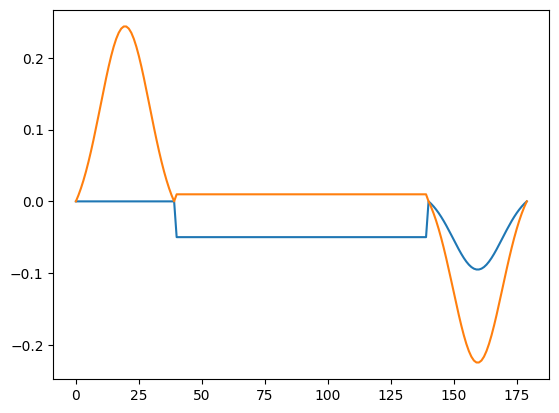

In [135]:
pulse = cavity_drive(alpha = 6, omega_d = 0, tw = 100, delta = del_c1)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

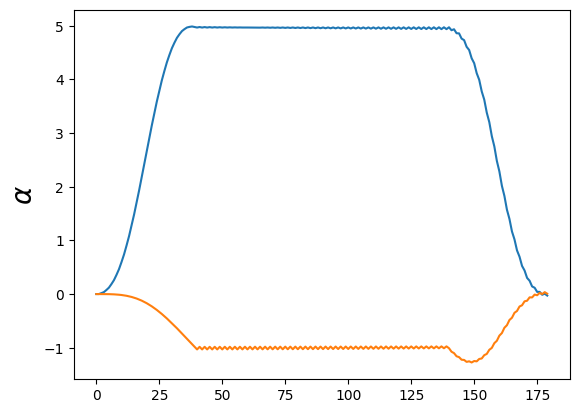

In [136]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(pulse, delta =del_c1)
plt.plot(alpha.real)
plt.plot(alpha.imag)
plt.ylabel(r'$\alpha$', fontsize = 20)
plt.show()

In [137]:
# del_c1 = 10 * 1e-03
# dec_c2 = 10 * 1e-03
# Omega_q = 11 * 1e-03

In [138]:
tw = 2000
alpha0 = 5
# Drives 
pulse1 = cavity_drive(alpha = alpha0, omega_d = 0, tw = tw, delta = del_c1)
pulse2 = cavity_drive(alpha = alpha0, omega_d = 0, tw = tw, delta = del_c2)

alpha1 = alpha_from_epsilon_nonlinear_finite_difference(pulse1, delta =del_c1)
alpha2 = alpha_from_epsilon_nonlinear_finite_difference(pulse2, delta =del_c2)


In [139]:
Omega_q

0.01

In [140]:
H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
      
      +1* Omega_q * tensor(sigmax(), identity_c, identity_c)/2  + 
      -1 * chi1 * tensor(sigmaz(), num_c, identity_c) +
      -1 * chi2 * tensor(sigmaz(), identity_c, num_c)
     )
     
# cos1 = np.array([np.cos(del_c1 * t) for t in times])
# cos2 = np.array([np.cos(del_c2 * t) for t in times])
del_q = chi1 * alpha1 * np.conjugate(alpha1) + chi2 * alpha2 * np.conjugate(alpha2)

H = [H0, 
   # [ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
    #  [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
     
     [tensor(identity_q, adag_c, identity_c ), pulse1], # Mode 1 Drive
    [tensor(identity_q, a_c, identity_c), np.conjugate(pulse1)], 
     
     [tensor(identity_q, identity_c, adag_c), pulse2], # Mode 2 Drive
    [tensor(identity_q, identity_c, a_c), np.conjugate(pulse2)],
    [tensor(sigmaz(), identity_c, identity_c ), del_q] # oscillating ac stark shift 
    ]
c_ops = []

In [141]:
T = len(pulse1)
times = np.linspace(0, T, T)#, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)

psi0 = tensor(minus, basis(n_c,0), basis(n_c, 1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

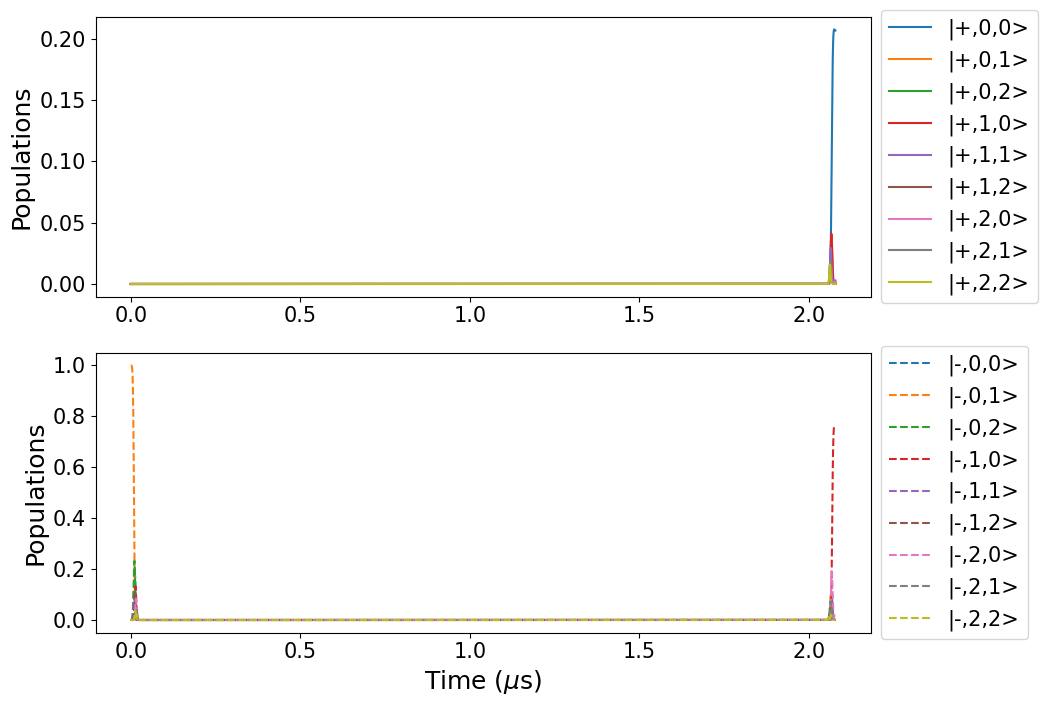

In [142]:
data = qload(states_filename)
plot_populations_plus_minus(data, figname = 'test')
plt.show()

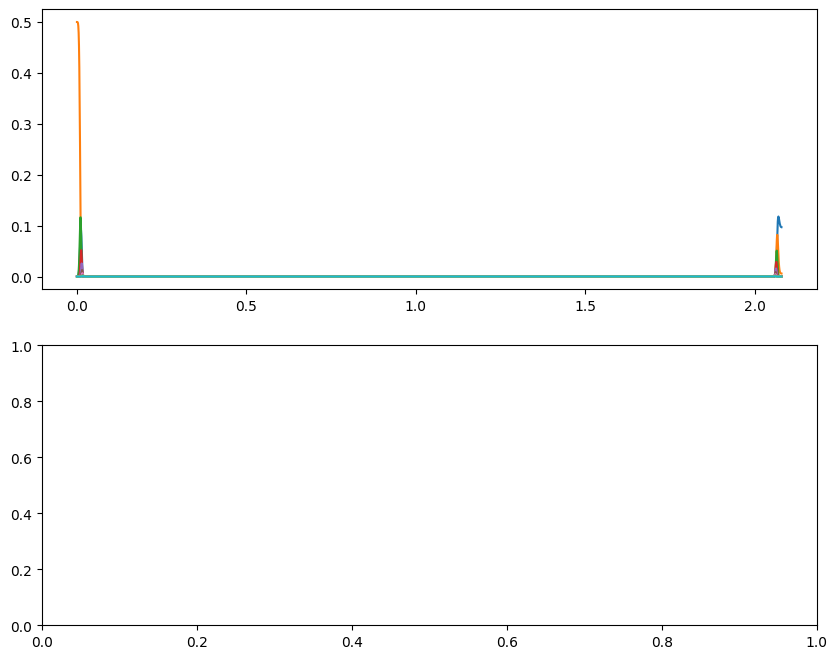

In [143]:
fig, axs = plt.subplots(2,1, figsize=(10,8))
output_states = output.states
probs = []
times = [k/1000 for k in range(len(output_states))]
max_num_levels = 10 # to be shown on the plot

#qubit grounded
for i in range(1):
    for j in range(max_num_levels):
        target = tensor(basis(n_q,0), basis(n_c, i), basis(n_c, j))
        pops = []
        for k in range(len(output_states)): 
            z = dot(target ,output_states[k])
            pops.append(z)
        axs[0].plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')
plt.show()

In [144]:
def vary_tw(tws, target): 
    
    #fids = []
    states = []
    
    for tw in tws:
        # create pulse
        #tw = 2000
        alpha0 = 6
        # Drives 
        pulse1 = cavity_drive(alpha = alpha0, omega_d = 0, tw = tw, delta = del_c1)
        pulse2 = cavity_drive(alpha = alpha0, omega_d = 0, tw = tw, delta = del_c2)

        alpha1 = alpha_from_epsilon_nonlinear_finite_difference(pulse1, delta =del_c1)
        alpha2 = alpha_from_epsilon_nonlinear_finite_difference(pulse2, delta =del_c2)
        # adding time dependent
        H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
              +1* Omega_q * tensor(sigmax(), identity_c, identity_c)/2  + 
              -1 * chi1 * tensor(sigmaz(), num_c, identity_c) +
              -1 * chi2 * tensor(sigmaz(), identity_c,num_c)
             )
     
        # cos1 = np.array([np.cos(del_c1 * t) for t in times])
        # cos2 = np.array([np.cos(del_c2 * t) for t in times])
        del_q = chi1 * alpha1 * np.conjugate(alpha1) + chi2 * alpha2 * np.conjugate(alpha2)

        H = [H0, 
           # [ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
            #  [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]

             [tensor(identity_q, adag_c, identity_c ), pulse1], # Mode 1 Drive
            [tensor(identity_q, a_c, identity_c), np.conjugate(pulse1)], 

             [tensor(identity_q, identity_c, adag_c), pulse2], # Mode 2 Drive
            [tensor(identity_q, identity_c, a_c), np.conjugate(pulse2)],
            [tensor(sigmaz(), identity_c, identity_c ), del_q] # oscillating ac stark shift 
            ]
        c_ops = []
    
        # SOlve Master equation 
        T = len(pulse1)
        times = np.linspace(0, T, T)#, dtype = np.int32)
        plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
        minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
        e_state = basis(n_q, 1)
        g_state = basis(n_q, 0)


        plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)

        psi0 = tensor(minus, basis(n_c,0), basis(n_c, 1))
        opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
        output = mesolve(H, psi0 , times, c_ops, [], options =opts)
        #states_filename = 'State_store_g0_g1_disp'
        #qsave(output.states, states_filename)
        rho = output.states[-1]
        
        # find fidelity 
        #fids.append(get_fidelity(rho, target))
        states.append(rho)
    return states

In [145]:
#target = tensor(minus, basis(n_c, 1))
tws = np.linspace(100, 2000, 10, dtype = np.int32)
# fids = vary_tw(tws, target)
states = vary_tw(tws, None)

In [149]:
tws

array([ 100,  311,  522,  733,  944, 1155, 1366, 1577, 1788, 2000])

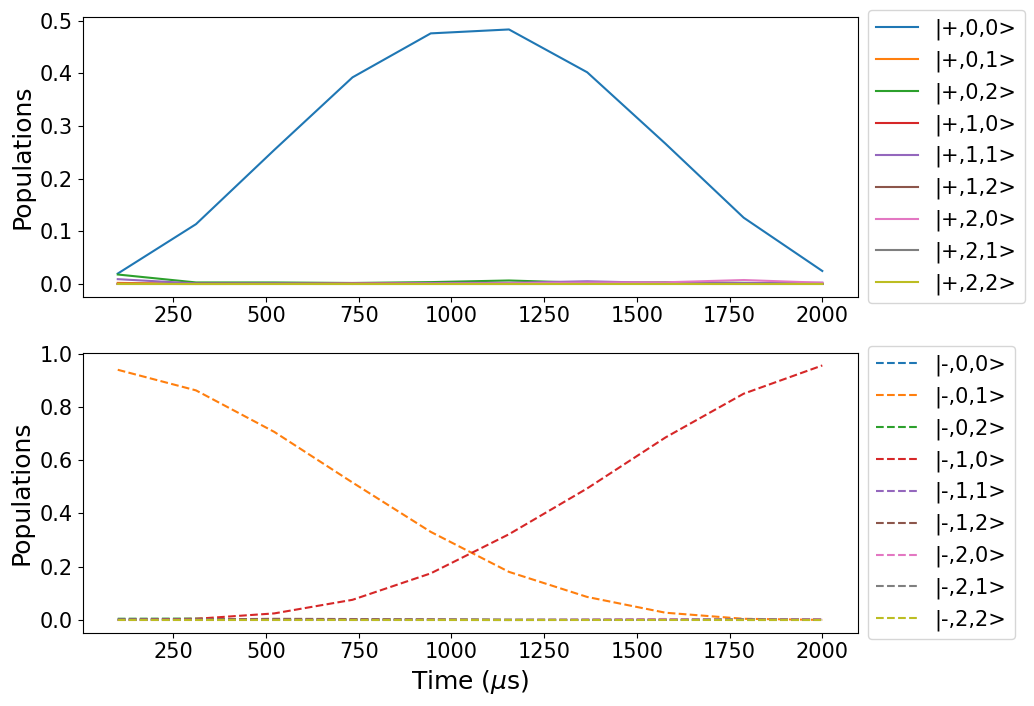

In [151]:
plot_populations_plus_minus(states, figname = 'test', times_ = tws)
plt.show()

I think for 0 wait time, the reason why populations don't return to 0 is that im losing  populations to combined states |n,n> so my disjoint picture of separate alpha might not be correct

Can try optimal control for displacement pulses or see in the limit of delta function

# Rotating frame with resonant cavity drive and detuned qubit (init has -00)
$$ H = \sum_{i = 1,2} \Delta_{c, i} a_i ^\dagger a  + \Delta_q \sigma_z /2+  \Omega_q \sigma_x/2 - \chi_i a_i^\dagger a\sigma_z + [\epsilon(t) a^\dagger + h.c.] $$

In [1]:
def cavity_drive(alpha = 2, omega_d = 0 , tw = 100, delta = 0):
    '''
    tw is wait time 
    pulse pattern - displace - wait - displace back
    '''

    ts = np.linspace(0, 40, 40)
    wave =  1.0j * alpha * norm_gaussian_wave(ts, omega_d)
    alpha0= alpha_from_epsilon_nonlinear_finite_difference(wave, delta = del_c1)[-1]

    # pulse pattern - displace - wait - displace back
    disp =  wave.copy()
    wait = np.array([-1 * delta * alpha0 for i in range(tw)])
    disp_back =  wave.copy() * -1 * np.exp(-1.0j * delta * ( len(disp)))
    pulse = np.concatenate((disp, wait, disp_back))
    return pulse 

In [2]:
pulse = cavity_drive(alpha = 6, omega_d = 0, tw = 100, delta = del_c1)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

NameError: name 'del_c1' is not defined

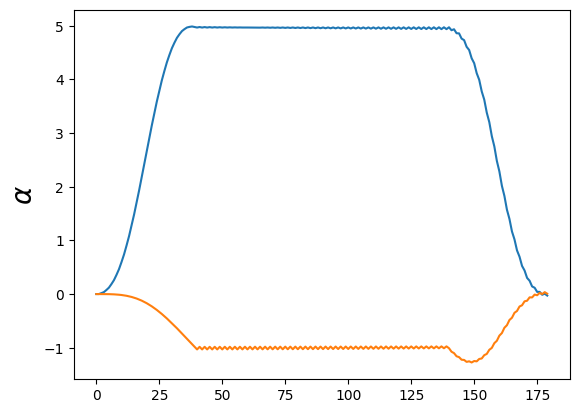

In [136]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(pulse, delta =del_c1)
plt.plot(alpha.real)
plt.plot(alpha.imag)
plt.ylabel(r'$\alpha$', fontsize = 20)
plt.show()

In [137]:
# del_c1 = 10 * 1e-03
# dec_c2 = 10 * 1e-03
# Omega_q = 11 * 1e-03

In [138]:
tw = 2000
alpha0 = 5
# Drives 
pulse1 = cavity_drive(alpha = alpha0, omega_d = 0, tw = tw, delta = del_c1)
pulse2 = cavity_drive(alpha = alpha0, omega_d = 0, tw = tw, delta = del_c2)

alpha1 = alpha_from_epsilon_nonlinear_finite_difference(pulse1, delta =del_c1)
alpha2 = alpha_from_epsilon_nonlinear_finite_difference(pulse2, delta =del_c2)


In [139]:
Omega_q

0.01

In [140]:
H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
      
      +1* Omega_q * tensor(sigmax(), identity_c, identity_c)/2  + 
      -1 * chi1 * tensor(sigmaz(), num_c, identity_c) +
      -1 * chi2 * tensor(sigmaz(), identity_c, num_c)
     )
     
# cos1 = np.array([np.cos(del_c1 * t) for t in times])
# cos2 = np.array([np.cos(del_c2 * t) for t in times])
del_q = chi1 * alpha1 * np.conjugate(alpha1) + chi2 * alpha2 * np.conjugate(alpha2)

H = [H0, 
   # [ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
    #  [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
     
     [tensor(identity_q, adag_c, identity_c ), pulse1], # Mode 1 Drive
    [tensor(identity_q, a_c, identity_c), np.conjugate(pulse1)], 
     
     [tensor(identity_q, identity_c, adag_c), pulse2], # Mode 2 Drive
    [tensor(identity_q, identity_c, a_c), np.conjugate(pulse2)],
    [tensor(sigmaz(), identity_c, identity_c ), del_q] # oscillating ac stark shift 
    ]
c_ops = []

In [141]:
T = len(pulse1)
times = np.linspace(0, T, T)#, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)

psi0 = tensor(minus, basis(n_c,0), basis(n_c, 1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

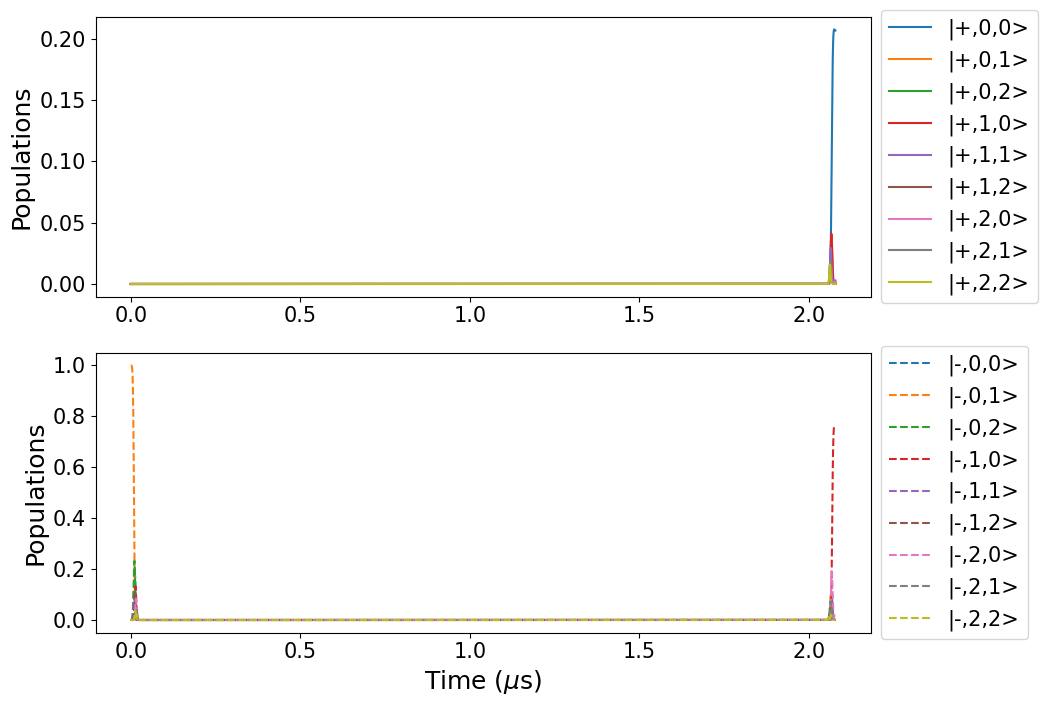

In [142]:
data = qload(states_filename)
plot_populations_plus_minus(data, figname = 'test')
plt.show()

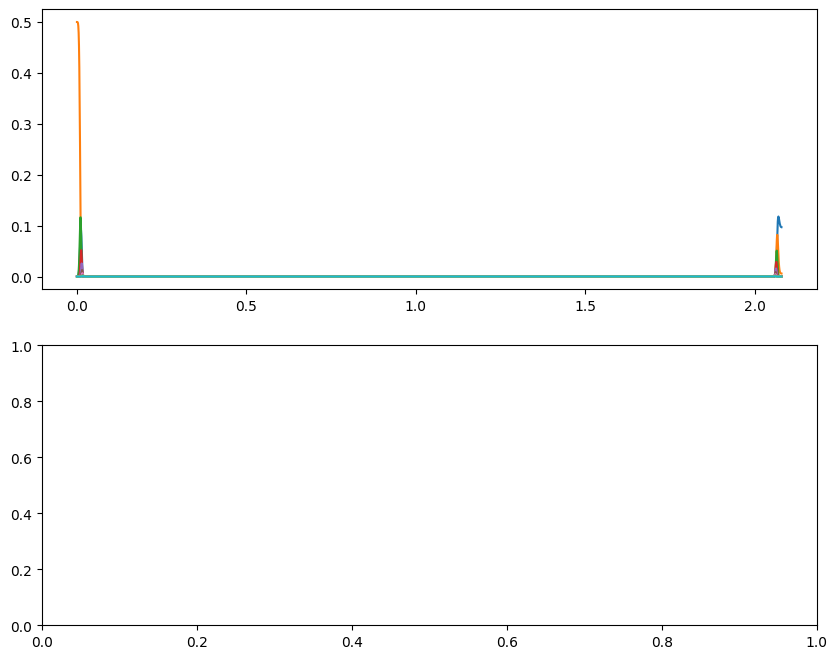

In [143]:
fig, axs = plt.subplots(2,1, figsize=(10,8))
output_states = output.states
probs = []
times = [k/1000 for k in range(len(output_states))]
max_num_levels = 10 # to be shown on the plot

#qubit grounded
for i in range(1):
    for j in range(max_num_levels):
        target = tensor(basis(n_q,0), basis(n_c, i), basis(n_c, j))
        pops = []
        for k in range(len(output_states)): 
            z = dot(target ,output_states[k])
            pops.append(z)
        axs[0].plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')
plt.show()

In [144]:
def vary_tw(tws, target): 
    
    #fids = []
    states = []
    
    for tw in tws:
        # create pulse
        #tw = 2000
        alpha0 = 6
        # Drives 
        pulse1 = cavity_drive(alpha = alpha0, omega_d = 0, tw = tw, delta = del_c1)
        pulse2 = cavity_drive(alpha = alpha0, omega_d = 0, tw = tw, delta = del_c2)

        alpha1 = alpha_from_epsilon_nonlinear_finite_difference(pulse1, delta =del_c1)
        alpha2 = alpha_from_epsilon_nonlinear_finite_difference(pulse2, delta =del_c2)
        # adding time dependent
        H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
              +1* Omega_q * tensor(sigmax(), identity_c, identity_c)/2  + 
              -1 * chi1 * tensor(sigmaz(), num_c, identity_c) +
              -1 * chi2 * tensor(sigmaz(), identity_c,num_c)
             )
     
        # cos1 = np.array([np.cos(del_c1 * t) for t in times])
        # cos2 = np.array([np.cos(del_c2 * t) for t in times])
        del_q = chi1 * alpha1 * np.conjugate(alpha1) + chi2 * alpha2 * np.conjugate(alpha2)

        H = [H0, 
           # [ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
            #  [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]

             [tensor(identity_q, adag_c, identity_c ), pulse1], # Mode 1 Drive
            [tensor(identity_q, a_c, identity_c), np.conjugate(pulse1)], 

             [tensor(identity_q, identity_c, adag_c), pulse2], # Mode 2 Drive
            [tensor(identity_q, identity_c, a_c), np.conjugate(pulse2)],
            [tensor(sigmaz(), identity_c, identity_c ), del_q] # oscillating ac stark shift 
            ]
        c_ops = []
    
        # SOlve Master equation 
        T = len(pulse1)
        times = np.linspace(0, T, T)#, dtype = np.int32)
        plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
        minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
        e_state = basis(n_q, 1)
        g_state = basis(n_q, 0)


        plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)

        psi0 = tensor(minus, basis(n_c,0), basis(n_c, 1))
        opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
        output = mesolve(H, psi0 , times, c_ops, [], options =opts)
        #states_filename = 'State_store_g0_g1_disp'
        #qsave(output.states, states_filename)
        rho = output.states[-1]
        
        # find fidelity 
        #fids.append(get_fidelity(rho, target))
        states.append(rho)
    return states

In [145]:
#target = tensor(minus, basis(n_c, 1))
tws = np.linspace(100, 2000, 10, dtype = np.int32)
# fids = vary_tw(tws, target)
states = vary_tw(tws, None)

In [149]:
tws

array([ 100,  311,  522,  733,  944, 1155, 1366, 1577, 1788, 2000])

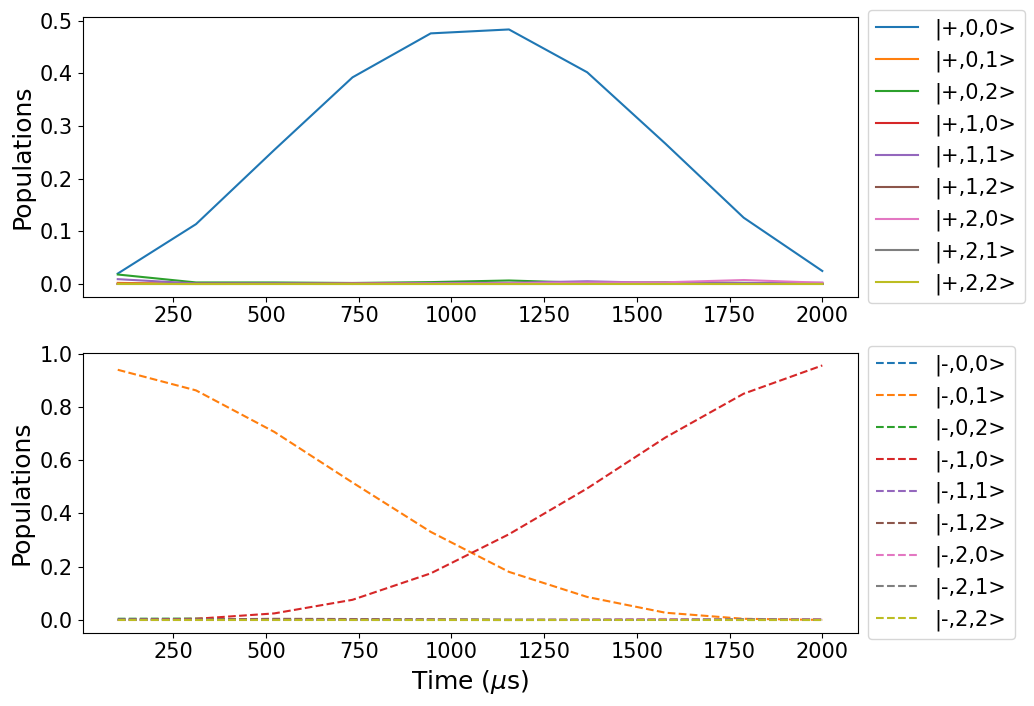

In [151]:
plot_populations_plus_minus(states, figname = 'test', times_ = tws)
plt.show()

I think for 0 wait time, the reason why populations don't return to 0 is that im losing  populations to combined states |n,n> so my disjoint picture of separate alpha might not be correct

# Same hamiltonian as above, but let's assume displacement of cavities

In [88]:
def cavity_drive(alpha = 2, alpha0 = 5, omega_d = 0 , tw = 100, delta = 0):
    '''
    tw is wait time 
    pulse pattern - displace - wait - displace back
    '''

    #ts = np.linspace(0, 40, 40)
    #wave =  1.0j * alpha * norm_gaussian_wave(ts, omega_d)
    #alpha0= alpha_from_epsilon_nonlinear_finite_difference(wave, delta = del_c1)[-1]
    
    # pulse pattern - displace - wait - displace back
    #disp =  wave.copy()
    wait = np.array([-1 * delta * alpha0 for i in range(tw)])
    #disp_back =  wave.copy() * -1 * np.exp(-1.0j * delta * ( len(disp)))
    pulse = wait#np.concatenate(( wait))
    return pulse 

In [89]:
alpha0 = 5+0.0j

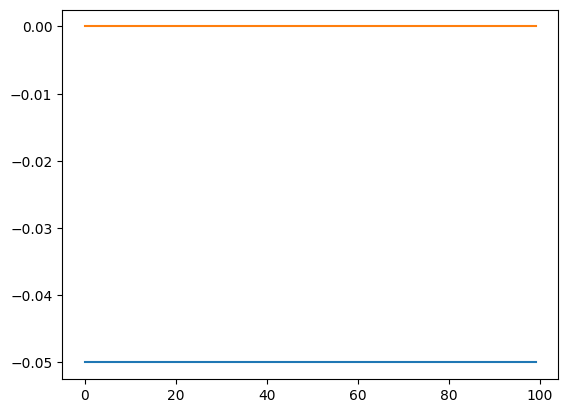

In [90]:
pulse = cavity_drive(alpha = None, alpha0 = alpha0, omega_d = 0, tw = 100, delta = del_c1)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

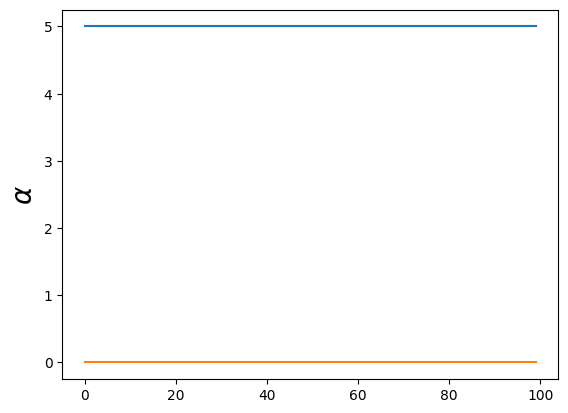

In [91]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(pulse, delta =del_c1, alpha_init = alpha0)
plt.plot(alpha.real)
plt.plot(alpha.imag)
plt.ylabel(r'$\alpha$', fontsize = 20)
plt.show()

In [87]:
Omega_q

0.01

In [24]:
# del_c1 = 10 * 1e-03
# dec_c2 = 10 * 1e-03
# Omega_q = 11 * 1e-03

In [107]:
tw = 4000
alpha0 = 5 + 0.0j
# Drives 
pulse1 = cavity_drive(alpha = None, alpha0 = alpha0, omega_d = 0, tw = tw, delta = del_c1)
pulse2 = cavity_drive(alpha = None, alpha0 = alpha0, omega_d = 0, tw = tw, delta = del_c2)

alpha1 = alpha_from_epsilon_nonlinear_finite_difference(pulse1, delta =del_c1, alpha_init = alpha0)
alpha2 = alpha_from_epsilon_nonlinear_finite_difference(pulse2, delta =del_c2, alpha_init = alpha0)


In [108]:
Omega_q

0.01

In [127]:
H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
      
      1* Omega_q * tensor(sigmax(), identity_c, identity_c)/2  + 
      -1 * chi1 * tensor(sigmaz(), num_c, identity_c) +
      -1 * chi2 * tensor(sigmaz(), identity_c, num_c)
     )
     
# cos1 = np.array([np.cos(del_c1 * t) for t in times])
# cos2 = np.array([np.cos(del_c2 * t) for t in times])
del_q = chi1 * alpha1 * np.conjugate(alpha1) + chi2 * alpha2 * np.conjugate(alpha2)

H = [H0, 
   # [ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
    #  [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]
     
     [tensor(identity_q, adag_c, identity_c ), pulse1], # Mode 1 Drive
    [tensor(identity_q, a_c, identity_c), np.conjugate(pulse1)], 
     
     [tensor(identity_q, identity_c, adag_c), pulse2], # Mode 2 Drive
    [tensor(identity_q, identity_c, a_c), np.conjugate(pulse2)],
    [tensor(sigmaz(), identity_c, identity_c ), del_q] # oscillating ac stark shift 
    ]
c_ops = []

In [128]:
T = len(pulse1)
times = np.linspace(0, T, T)#, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)

psi0 = tensor(minus, basis(n_c,0), basis(n_c, 1))
# perfect displacement
psi0 = tensor(identity_q, displace(n_c, alpha0), displace(n_c, alpha0)) * psi0


opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

# perfect displacement back 
alpha_back = -1 * alpha0
rho_back = tensor(identity_q, displace(n_c, alpha_back), displace(n_c, alpha_back)) * output.states[-1]

In [129]:
# new_states = []
# for state in output.states: 
#     n_state = tensor(identity_q, displace(n_c, alpha_back), displace(n_c, alpha_back)) * state
#     new_states.append(n_state)

In [130]:
# plot_populations(new_states, figname = 'test')
# plt.show()

In [131]:
#sample evey n'th state 
sampled_states = []
times_ = []

n = 0
i = 0
while (i < len(output.states)): 
    n+=1
    if n==50: 
        print('i')
        n=0 
        samp_state = tensor(identity_q, displace(n_c, alpha_back), displace(n_c, alpha_back)) * output.states[i]
        sampled_states.append(samp_state)
        times_.append(i)
    i+=1
len(sampled_states)

i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i


80

In [132]:
# plot_populations(sampled_states, figname = 'test')
# plt.show()

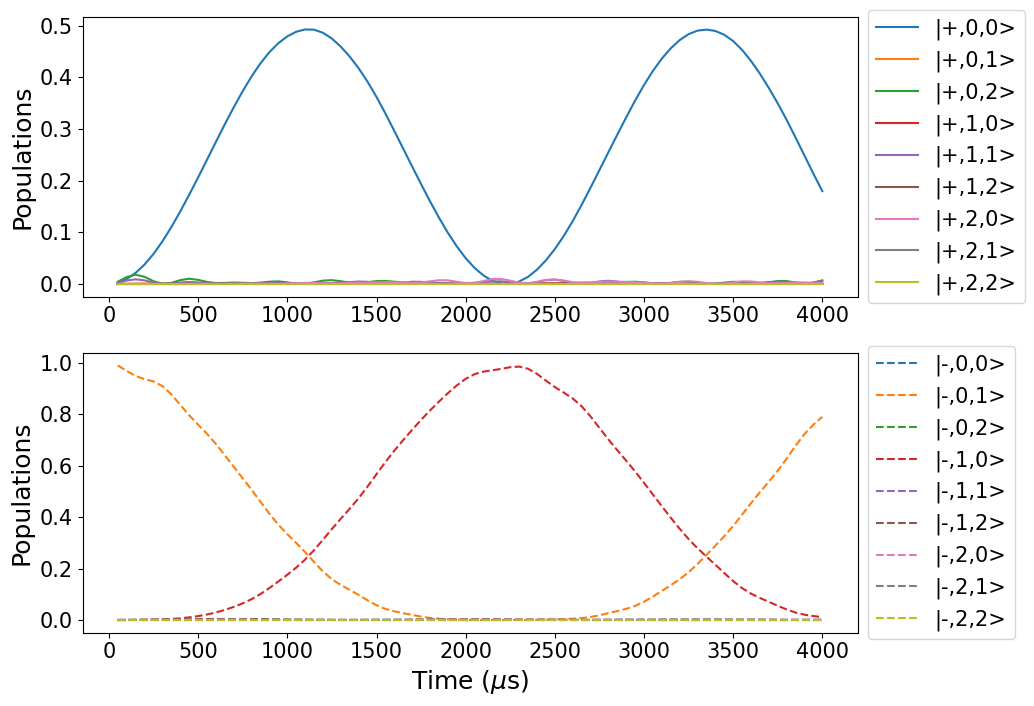

In [133]:
#times_ = []
plot_populations_plus_minus(sampled_states, figname = 'test', times_ = times_)
plt.show()

In [119]:
del_q

array([0.01+0.j, 0.01+0.j, 0.01+0.j, ..., 0.01+0.j, 0.01+0.j, 0.01+0.j])

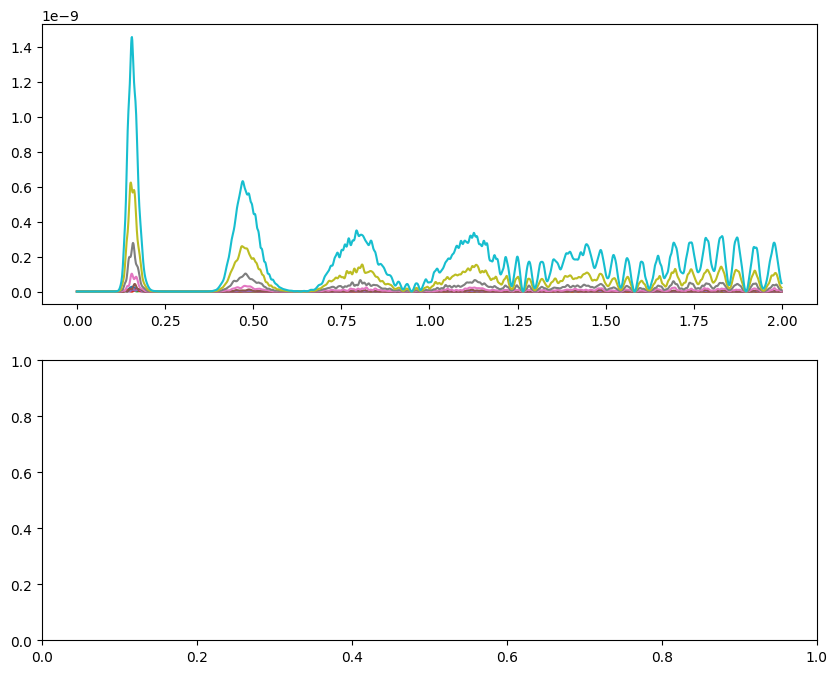

In [465]:
fig, axs = plt.subplots(2,1, figsize=(10,8))
output_states = output.states
probs = []
times = [k/1000 for k in range(len(output_states))]
max_num_levels = 10 # to be shown on the plot

#qubit grounded
for i in range(1):
    for j in range(max_num_levels):
        target = tensor(basis(n_q,0), basis(n_c, i), basis(n_c, j))
        pops = []
        for k in range(len(output_states)): 
            z = dot(target ,output_states[k])
            pops.append(z)
        axs[0].plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')
plt.show()

In [329]:
def vary_tw(tws, target): 
    
    #fids = []
    states = []
    
    for tw in tws:
        # create pulse
        #tw = 2000
        alpha0 = 6
        # Drives 
        pulse1 = cavity_drive(alpha = alpha0, omega_d = 0, tw = tw, delta = del_c1)
        pulse2 = cavity_drive(alpha = alpha0, omega_d = 0, tw = tw, delta = del_c2)

        alpha1 = alpha_from_epsilon_nonlinear_finite_difference(pulse1, delta =del_c1)
        alpha2 = alpha_from_epsilon_nonlinear_finite_difference(pulse2, delta =del_c2)
        # adding time dependent
        H0 = (del_c1*tensor(identity_q, num_c, identity_c) +
      del_c2*tensor(identity_q, identity_c, num_c) +
              +1* Omega_q * tensor(sigmax(), identity_c, identity_c)/2  + 
              -1 * chi1 * tensor(sigmaz(), num_c, identity_c) +
              -1 * chi2 * tensor(sigmaz(), identity_c, a_c + adag_c)
             )
     
        # cos1 = np.array([np.cos(del_c1 * t) for t in times])
        # cos2 = np.array([np.cos(del_c2 * t) for t in times])
        del_q = chi1 * alpha1 * np.conjugate(alpha1) + chi2 * alpha2 * np.conjugate(alpha2)

        H = [H0, 
           # [ 2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c, identity_c), cos1], 
            #  [2*chi2 * alpha2 * tensor(sigmax(), identity_c, a_c + adag_c), cos2]

             [tensor(identity_q, adag_c, identity_c ), pulse1], # Mode 1 Drive
            [tensor(identity_q, a_c, identity_c), np.conjugate(pulse1)], 

             [tensor(identity_q, identity_c, adag_c), pulse2], # Mode 2 Drive
            [tensor(identity_q, identity_c, a_c), np.conjugate(pulse2)],
            [tensor(sigmaz(), identity_c, identity_c ), del_q] # oscillating ac stark shift 
            ]
        c_ops = []
    
        # SOlve Master equation 
        T = len(pulse1)
        times = np.linspace(0, T, T)#, dtype = np.int32)
        plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
        minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
        e_state = basis(n_q, 1)
        g_state = basis(n_q, 0)


        plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)

        psi0 = tensor(minus, basis(n_c,0), basis(n_c, 1))
        opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
        output = mesolve(H, psi0 , times, c_ops, [], options =opts)
        #states_filename = 'State_store_g0_g1_disp'
        #qsave(output.states, states_filename)
        rho = output.states[-1]
        
        # perfect displacement back 
        alpha_back = -1 * alpha0
        rho_back = tensor(identity_q, displace(n_c, alpha_back), displace(n_c, alpha_back)) * rho
        
        # find fidelity 
        #fids.append(get_fidelity(rho, target))
        states.append(rho)
    return states

In [330]:
#target = tensor(minus, basis(n_c, 1))
tws = np.linspace(100, 2000, 10, dtype = np.int32)
# fids = vary_tw(tws, target)
states = vary_tw(tws, None)

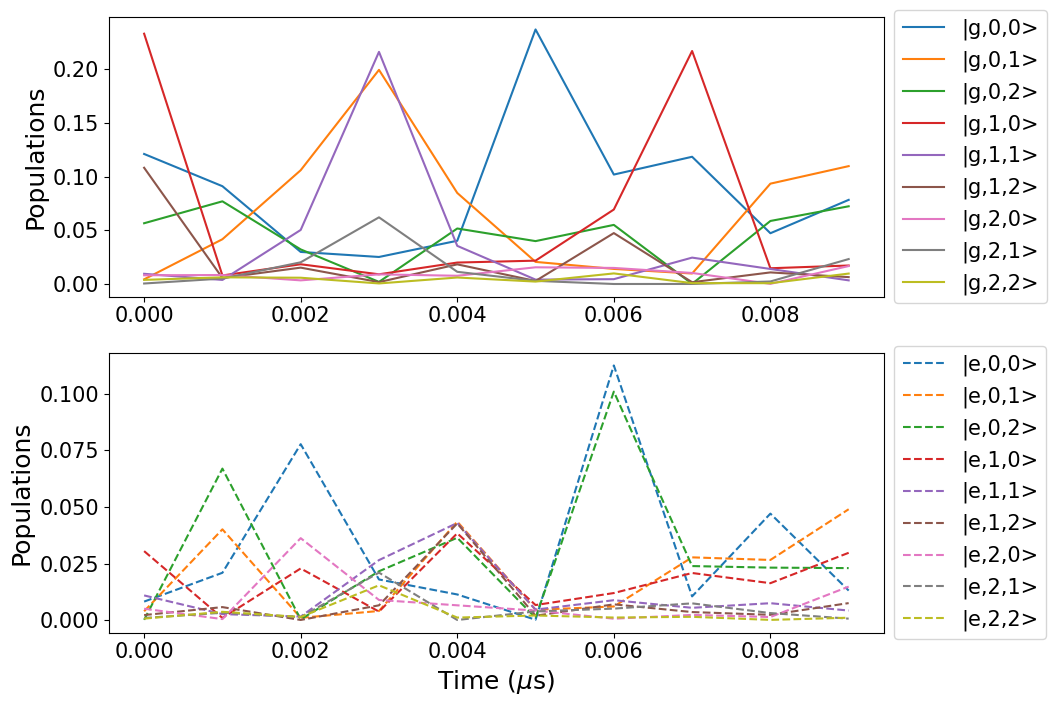

In [331]:
plot_populations(states, figname = 'test')
plt.show()